LOGISTIC REGRESSION CASE STUDY

Telecom churn case study 
with 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# importing all datasets with corrected paths
churn_data = pd.read_csv(r'C:\Users\devth\Documents\VScode files\Machine learning\LR_data_cs\churn_data.csv')
customer_data = pd.read_csv(r'C:\Users\devth\Documents\VScode files\Machine learning\LR_data_cs\customer_data.csv')
internet_data = pd.read_csv(r'C:\Users\devth\Documents\VScode files\Machine learning\LR_data_cs\internet_data.csv')

churn_data.head()
customer_data.head()    
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [3]:
# merging on customer_id 
df_1=pd.merge(churn_data,customer_data,how='inner',on='customerID')
df_1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [4]:
# final dataframes with all predictor variables 
telecom = pd.merge(df_1,internet_data,how='inner',on='customerID')
telecom.head()
telecom.info()
telecom.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


Data Preparation

In [5]:
# converting yes to 1 and no to 0 
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes':1,'No':0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes':1,'No':0})
telecom['Churn'] = telecom['Churn'].map({'Yes':1,'No':0})   
telecom['Partner']=telecom['Partner'].map({'Yes':1,'No':0})
telecom['Dependents']=telecom['Dependents'].map({'Yes':1,'No':0})
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


Dummy variable creation

In [6]:
# creating a dummy variable for the variable 'Contract' and dropping the first one
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
# adding the results to the master dataframe 
telecom = pd.concat([telecom,cont],axis=1)

# creating a dummy variable for the variable 'PaymentMethod' and dropping the first one
pay = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
# adding the results to the master dataframe
telecom = pd.concat([telecom,pay],axis=1)

# creating a dummy variable for the variable gender and dropping the first one 
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
# adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# creating a dummy variable for the variable mupltipleLines and dropping the first one
mul = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines',drop_first=True)
# adding the results to the master dataframe 
telecom = pd.concat([telecom,mul],axis=1)

# creating a dummy variable for the variable InternetService and dropping the first one
int = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
# adding the results to the master dataframe
telecom = pd.concat([telecom,int],axis=1)

# creating a dummy variable for the variable OnlineSecurity and dropping the first one
sec = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity',drop_first=True)
# adding the results to the master dataframe
telecom = pd.concat([telecom,sec],axis=1)

# creating a dummy variable for the variable OnlineBackup and dropping the first one
back = pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup',drop_first=True)
# adding the results to the master dataframe
telecom = pd.concat([telecom,back],axis=1)

# creating a dummy variable for the variable DeviceProtection and dropping the first one
dev = pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection',drop_first=True)
# adding the results to the master dataframe
telecom = pd.concat([telecom,dev],axis=1)

# creating a dummy variable for the variable TechSupport and dropping the first one
sec = pd.get_dummies(telecom['TechSupport'],prefix='TechSupport',drop_first=True)
# adding the results to the master dataframe
telecom = pd.concat([telecom,sec],axis=1)

# creating a dummy variable for the variable StreamingTV and dropping the first one
stream = pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV',drop_first=True)
# adding the results to the master dataframe
telecom = pd.concat([telecom,stream],axis=1)

# creating a dummy variable for the variable StreamingMovies and dropping the first one
stream = pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies',drop_first=True)
# adding the results to the master dataframe
telecom = pd.concat([telecom,stream],axis=1)

telecom.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,True,False,False,False,False,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,False,False,False,True,False,False,False,False,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,True,False,False,False,False,False,False,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,False,False,False,True,False,True,False,False,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,False,False,False,False,False,False,False,False,False,False


Dropping the repeated Variables

In [7]:
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1)
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,False,True,False,False,False,False,False,False,False,False
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,False,True,False,False,False,False,False,False,False,False
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,False,False,False,True,False,True,False,False,False,False
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# this variable was imported as a string and we need to convert it to a float 
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,False,True,False,False,False,False,False,False,False,False
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,False,True,False,False,False,False,False,False,False,False
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,False,False,False,True,False,True,False,False,False,False
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [9]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

In [ ]:
bool_columns = telecom.select_dtypes(include='bool').columns
telecom[bool_columns] = telecom[bool_columns].astype('uint8')
telecom.info()
telecom.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Cheaking for Outliners

In [ ]:
'''checking for outliers in the continous variables'''
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
num_telecom.head()

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
0,1,29.85,0,29.85
1,34,56.95,0,1889.50
2,2,53.85,0,108.15
3,45,42.30,0,1840.75
4,2,70.70,0,151.65


In [ ]:
# checking outliers at 25%, 50%, 75% 90%, 95%, 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


Since there is no huge jump in outliers going from 25-50-75 to other percentiles then our data is good to go

Checking for missing values and Inputing them

In [ ]:
#adding up the missing values colomn wise
telecom.isnull().sum() 

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service

In [ ]:
# since there are 11 missing values in the total data its best to remove that data from the observation analysis
# removing the NAN values from the dataset 

telecom = telecom[~np.isnan(telecom['TotalCharges'])]
telecom.isnull().sum() # checking for missing values again

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBacku

Feature Standardization 

In [ ]:
# normalizing continous features

df= telecom[['tenure','MonthlyCharges','TotalCharges']]
normalized_df = (df-df.mean())/df.std()
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1)
telecom = pd.concat([telecom, normalized_df], axis=1)
telecom

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.239416,0.196164,-0.940391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,1,0,1,0,1,0,1,-0.343113,0.664821,-0.129171
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,1,0,0,0,1,0,1,1.612459,1.276402,2.240896
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,-0.872746,-1.169921,-0.854453
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,-1.157934,0.319145,-0.872033


Checking the churn rate

In [ ]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

We have almost 27% churn rate is a high value for churn rate

Model building 

Splitting data into training and test sets 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# putting the feature variable into X 
X = telecom.drop(['Churn', 'customerID'], axis=1)

# putting response variable into y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [31]:
# splitting the model into train and test data 

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3, random_state=100)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4922, 30), (2110, 30), (4922,), (2110,))

In [32]:
# running your first training model

import statsmodels.api as sm

In [33]:
#logistic regression model
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 14 Apr 2025   Deviance:                       4009.4
Time:                        20:15:21   Pearson chi2:                 6.07e+03
No. Iterations:                    16   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3056      0.773     -2.984      0.003      -3.820      -0.791
PhoneService                             -0.6775      0.090     -7.495      0.000      -0.855      -0.500
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No phone service           -1.6282      0.775     -2.100      0.036      -3.148      -0.108
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineSecurity_No internet service       -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_No internet service         -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_No internet service     -0.3970      0.140     -2.831      0.005      -0.672      -0.122
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_No internet service          -0.3970      0.140     -2.831      0.005      -0.672      -0.122
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_No internet service          -0.3970      0.140     -2.831      0.005      -0.672      -0.122
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
Streaming

Correlation matrix

In [34]:
# import matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns


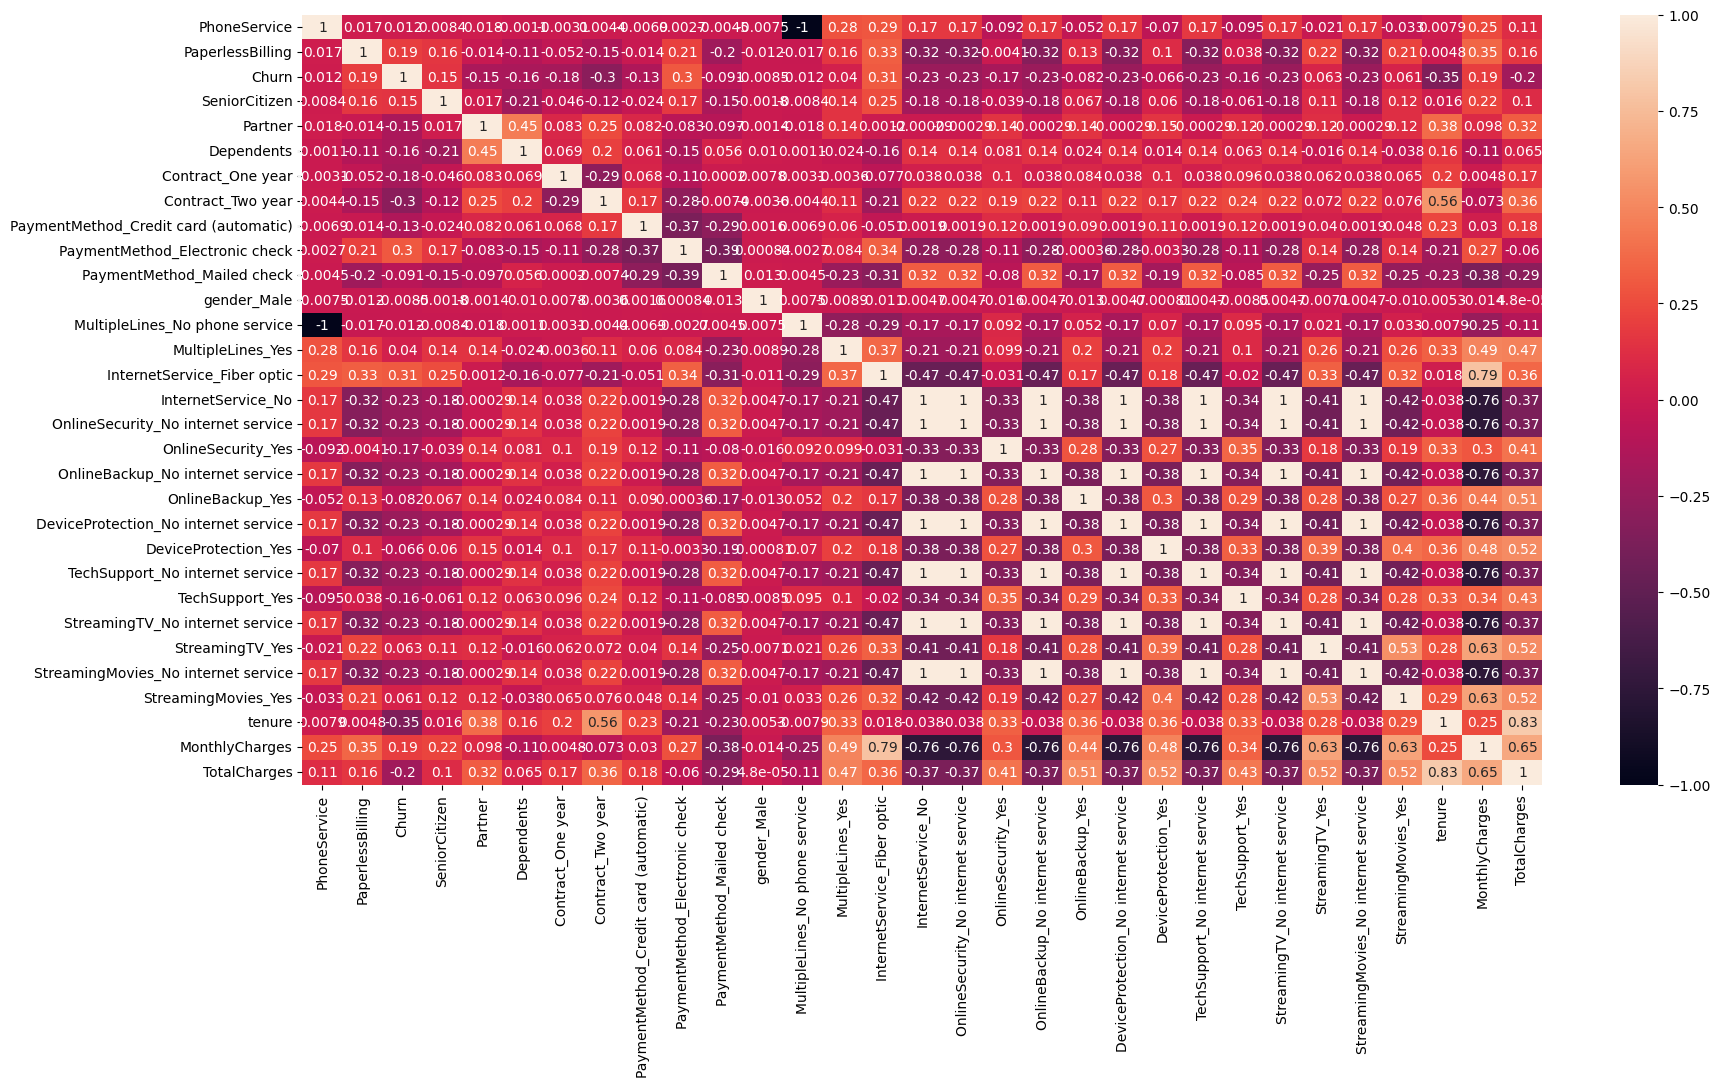

In [38]:
# lets see the correlation matrix 

plt.figure(figsize=(20,10))
sns.heatmap(telecom.select_dtypes(include='number').corr(), annot=True)
plt.show()

In [41]:
# removing highly correlated variables
x_test2 = X_test.drop([ 'MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service'], axis=1)
x_train2 = X_train.drop([ 'MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service'], axis=1)


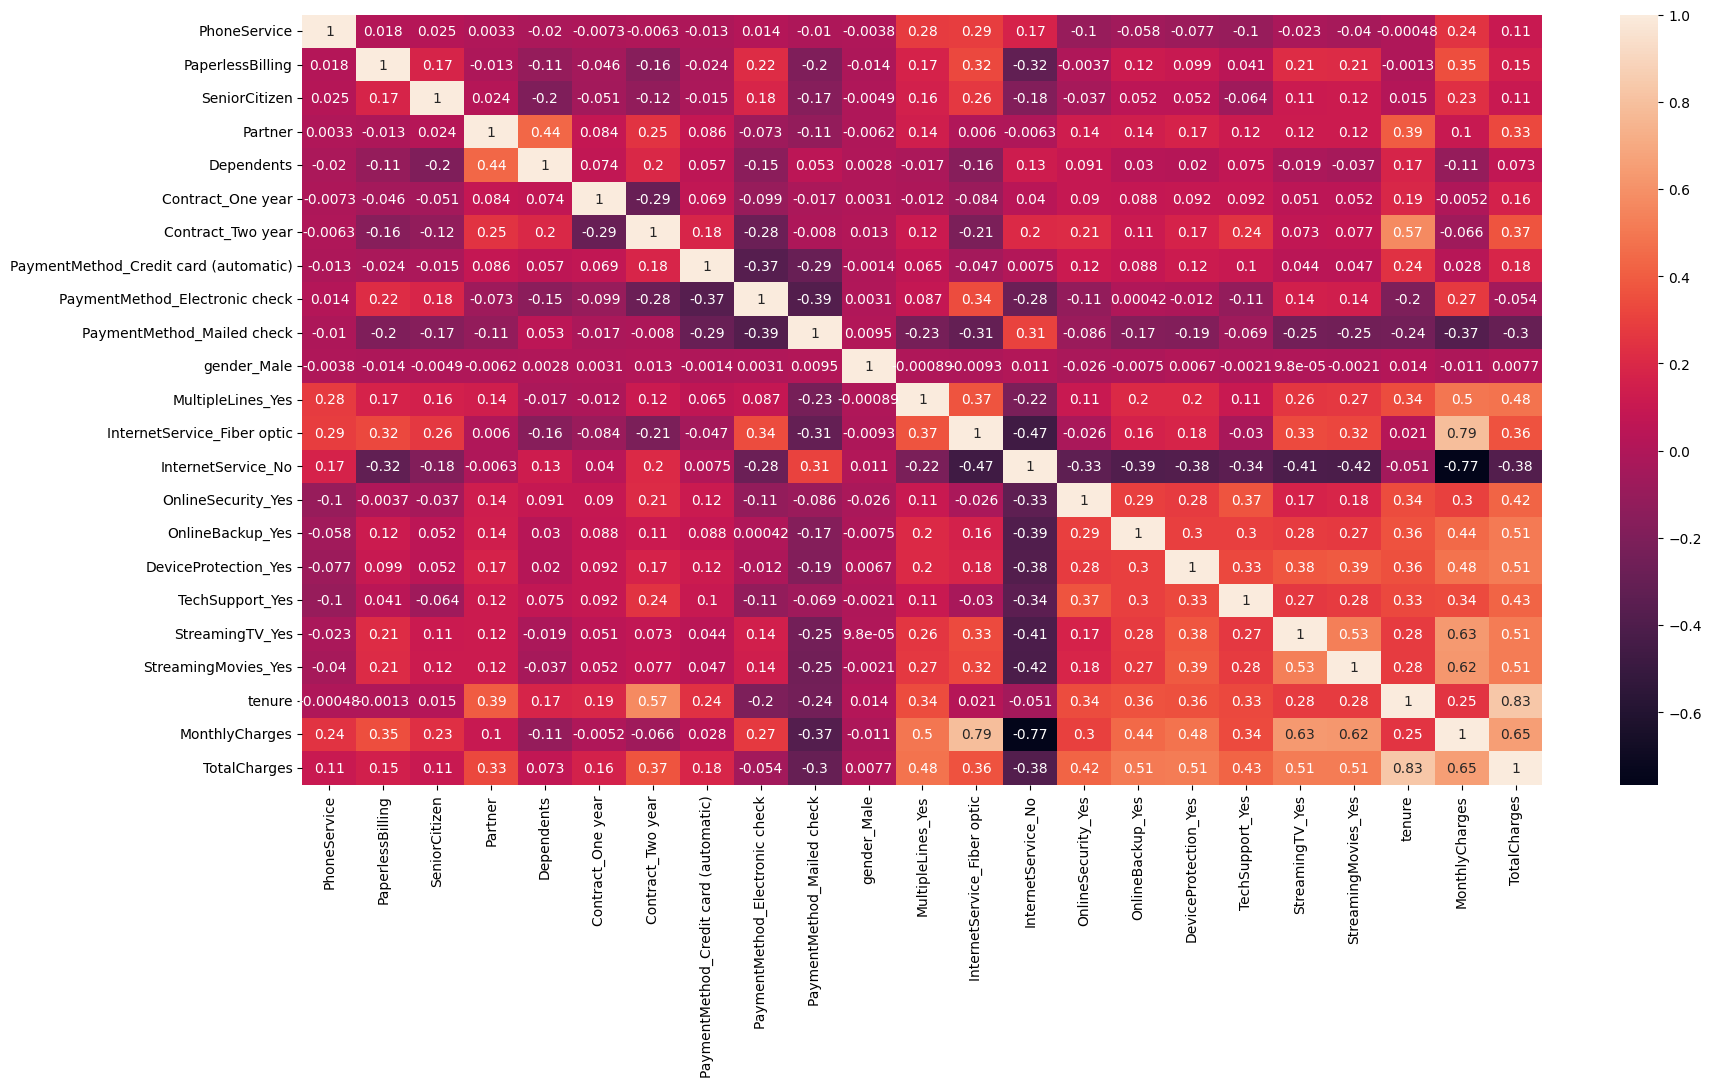

In [42]:
# checking the correlation matrix again
plt.figure(figsize=(20,10))
sns.heatmap(x_train2.corr(), annot=True)
plt.show()

In [43]:
# rerunnning the model 
# Now lets run the model after dropping highly correlated variables

logm2 = sm.GLM(Y_train,(sm.add_constant(x_train2)),family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 14 Apr 2025   Deviance:                       4009.4
Time:                        20:36:53   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""